# **Preventative Factors for Diabetes**

Diabetes is one of the most prevalent chronic diseases in the US. It is suspected that diabetes and its prevalence varies by age, education, income, location, race, and other social determinants of health. This analysis will dive into this topic and seek to provide insight into risk factors that are most predictive of diabetes risk.

## Overview
[Data set](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?datasetId=1703281&searchQuery=statsmodels&select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv) 

This dataset contains survey responses to the CDC's Behavioral Risk Factor Surveillance System from 2015. The dataset consists of 70,692 records.

## Research Questions


1.  Is there a significant difference between the BMI for patients with diabetes versus without diabetes?
2.  Is there a significant difference in the proportion of patients with diabetes who did not see the doctor due to cost and those paitents who did see the doctor?
3.  Is there is a significant difference in the proportion of patients with diabetes and patients who make below poverty level income and patients who make above poverty level income?


## Getting to know the data
Here are the tools and libraries used for this inquiry

In [ ]:
from io import StringIO
import pandas as pd
import statsmodels.stats.proportion as smprop   
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats.stats import ttest_ind
import math 
import seaborn as sns 
sns.set_style("white")
import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataset can be found on this link below.

In [ ]:
url='https://drive.google.com/file/d/1BQogbeso_YjJ7BcVfyNEtS7lnGPIwNkZ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

Import Drive from google.colab and Mount our Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Create Data Frame

In [ ]:
diabetes_df = pd.read_csv('/content/gdrive/MyDrive/Thinkful/Capstone 3/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

## Data Exploration

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Inspect the first five rows of the data

In [ ]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Inspect descriptive statistics for the entire data frame


In [ ]:
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Data Manipulation

### Find number of records for patients with and without diabetes

In [ ]:
diabetes_df['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

### Check descriptive for BMI

In [ ]:
diabetes_df[['BMI']].describe()

,BMI
count,70692.000000
mean,29.856985
std,7.113954
min,12.000000
25%,25.000000
50%,29.000000
75%,33.000000
max,98.000000


### Create histogram to check for normality in BMI

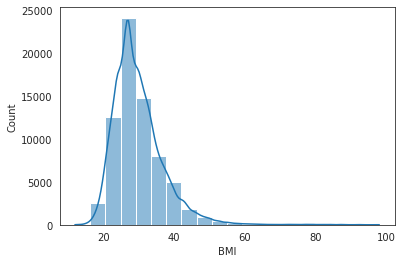

In [ ]:
ax = sns.histplot(diabetes_df['BMI'], bins=20, kde=True)

The sample size for BMI is greater than 30 and the group follows a nearly normal distribution. These precondition follows the criteria for doing a t-test.			
			
			

## **Test #1**
Is there is a significant difference between the BMI for patients with diabetes versus without diabetes?

> Null Hypothesis: There is no statistically significant difference between BMI for patients with diabetes or without diabetes.
> Alternative Hypothesis: There is a statistically significant difference between BMI for patients with diabetes or without diabetes. 

### Filter data to get 2 groups 
1.   Patients without Diabetes
2.   Patients with Diabetes


In [ ]:
diabetes_n = diabetes_df[diabetes_df['Diabetes_binary'] == 0]
diabetes_y = diabetes_df[diabetes_df['Diabetes_binary'] == 1]

### Run t-test for BMI

In [ ]:
stats.ttest_ind(diabetes_n['BMI'], diabetes_y['BMI'])

Ttest_indResult(statistic=-81.59089746755323, pvalue=0.0)

### Calculate the sample size, mean, and variance of each sample.

In [ ]:
sample_1_n = diabetes_n.shape[0]
sample_2_n = diabetes_y.shape[0]
sample_1_mean = diabetes_n['Income'].mean()
sample_2_mean = diabetes_y['Income'].mean()
sample_1_var = diabetes_n['Income'].var()
sample_2_var = diabetes_y['Income'].var()

### Calculate the standard error and compute the confidence intervals.


In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -1.0076849869828755 and -0.9451809667318308.


### Make a boxplot to visualize our difference


The average BMI for a person without diabetes is around 28 while the average BMI for a person with diabetes is 32.

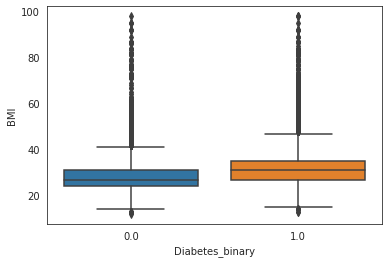

In [ ]:
sns.boxplot(y = diabetes_df['BMI'], x = diabetes_df['Diabetes_binary'])

The p-value is 0.0 which is smaller than our alpha of 0.05, which tells us that it is unlikely to observe as extreme of a difference as we are seeing if Ho is true. 			
			
We reject Ho (null hypothesis) as the data provides convincing evidence to suggest Ho is wrong. 

The difference between the average BMI of patients with diabetes and without diabetes **is statistically significant, using a significance level of 0.05.**

We are 95% confident the population difference in means lies between -1.01 and -0.95.

## **Test #2**
Is there a significant difference in the proportion of paitents with diabetes who did not see the doctor due to cost and those paitents who did see the doctor?

> Null Hypothesis: There is no statistically significant difference in the proportion of patients with diabetes who did not see the doctor due to cost and patients who did see the doctor. 

> Alternative Hypothesis: There is a statistically significant difference in the proportion of patients with diabetes who did not see the doctor due to cost and patients who did see the doctor. 

In [ ]:
#Seperate our groups into separate DataFrames - Needed to see a doctor but could not because of cost? 0 = no (Doc) 1 = yes (NoDoc)
doc = diabetes_df[diabetes_df['NoDocbcCost'] == 0]
nodoc = diabetes_df[diabetes_df['NoDocbcCost'] == 1]

In [ ]:
# Get the counts we need to do our two proportion z-test.
doc_n = doc.shape[0]
doc_diabetes_n = doc[doc['Diabetes_binary'] == 1].shape[0]
print('doc_n = {}'.format(doc_n))
print('doc_diabetes_n  = {}'.format(doc_diabetes_n))

no_doc_n = nodoc.shape[0]
no_doc_diabetes_n = nodoc[nodoc['Diabetes_binary'] == 1].shape[0]
print('no_doc_n = {}'.format(no_doc_n))
print('no_doc_diabetes_n  = {}'.format(no_doc_diabetes_n))

doc_n = 64053
doc_diabetes_n  = 31604
no_doc_n = 6639
no_doc_diabetes_n  = 3742


In [ ]:
smprop.proportions_ztest([doc_diabetes_n, no_doc_diabetes_n], 
                         [doc_n, no_doc_n], 
                         value=0, alternative='two-sided', prop_var=False)

(-10.894837861142186, 1.2198364153121446e-27)

The p-value is 1.22*10^-27, which is a lot smaller than our alpha of 0.05, which tells us that it is unlikely to observe as extreme of a difference as we are seeing if Ho is true. 			
			
We reject Ho (null hypothesis) as the data provides convincing evidence to suggest Ho is wrong. 

The difference in proportion between the patients with diabetes who did not go to the doctors due to cost and patients that could see the doctor **is statistically significant, using a significance level of 0.05.**

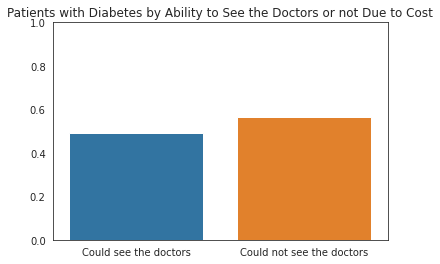

In [ ]:
doc_proportion = doc_diabetes_n / doc_n
no_doc_proportion = no_doc_diabetes_n / no_doc_n

sns.barplot(x=['Could see the doctors', 
    'Could not see the doctors'], 
 y=[doc_proportion, no_doc_proportion])
plt.ylim([0, 1.0])
_ = plt.title('Patients with Diabetes by Ability to See the Doctors or not Due to Cost')

### Test #3

Is there is a significant difference in the proportion of patients with diabetes and patients who make below poverty level income and patients who make above poverty level income?

> Null Hypothesis: There is no statistically significant difference in the proportion of diabetes diagnosis between patients who make below poverty level income and patients who make above poverty level income.

> Alternative Hypothesis: There is a statistically significant difference in the proportion of diabetes diagnosis between patients who make below poverty level income and patients who make above poverty level income.

In [ ]:
# Find number of records for patients' incomes
# Income scale 1-8 1 = less than $10,000 2 = less than $15,000 5 = less than $35,000 8 = $75,000 or more
diabetes_df['Income'].value_counts()

8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: Income, dtype: int64

In [ ]:
# Get the counts we need to do our two proportion z-test.
above_poverty = diabetes_df[diabetes_df['Income'] >2]
below_poverty = diabetes_df[diabetes_df['Income'] <=2]

above_n = above_poverty.shape[0]
above_diabetes_n = above_poverty[above_poverty['Diabetes_binary'] == 1].shape[0]
print('above_n = {}'.format(above_n))
print('above_diabetes_n  = {}'.format(above_diabetes_n))

below_n = below_poverty.shape[0]
below_diabetes_n = below_poverty[below_poverty['Diabetes_binary'] == 1].shape[0]
print('below_n = {}'.format(below_n))
print('below_diabetes_n  = {}'.format(below_diabetes_n))

above_n = 62583
above_diabetes_n  = 29877
below_n = 8109
below_diabetes_n  = 5469


In [ ]:
smprop.proportions_ztest([above_diabetes_n, below_diabetes_n], 
                         [above_n, below_n], 
                         value=0, alternative='two-sided', prop_var=False)

(-33.38921762044181, 1.9658341832491916e-244)

The p-value is 1.97* 10^-244, which is a lot smaller than our alpha of 0.05, which tells us that it is unlikely to observe as extreme of a difference as we are seeing if Ho is true.

We reject Ho (null hypothesis) as the data provides convincing evidence to suggest Ho is wrong.

The difference in proportion between the patients with diabetes who make below poverty level income and patients who make above poverty level income **is statistically significant, using a significance level of 0.05.**

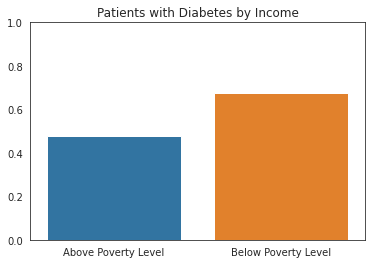

In [ ]:
above_proportion = above_diabetes_n / above_n
below_proportion = below_diabetes_n / below_n

sns.barplot(x=['Above Poverty Level', 
    'Below Poverty Level'], 
 y=[above_proportion, below_proportion])
plt.ylim([0, 1.0])
_ = plt.title('Patients with Diabetes by Income')

## Results


1.   There is a statistically significant difference between BMI for patients with diabetes or without diabetes. 
2.   There is a statistically significant difference in the proportion of patients with diabetes who did not see the doctor due to cost and patients who did see the doctor.
3.   There is a statistically significant difference in the proportion of diabetes diagnosis between patients who make below poverty level income and patients who make above poverty level income.



## Recommendations
This study aimed to see the impact of different variables on diabetes diagnosis.

Findings from the study demonstrated that there is a statistically significant difference between patients who have diabetes and factors including their BMI, ability to see the doctor due to cost, and income. The box plot visualizations show that BMI is lower in patients without diabetes. The first bar plot visualization shows that there were more patients with diabetes who needed to go to the doctor but couldn't due to cost. The second bar plot visualization shows that there were more patients with diabetes who made a below poverty level income. 

Due to these findings, I believe it is important for healthcare workers to promote strategies like losing weight, eating healthy, being active, and receiving medical treatments so patients can mitigate the harms of this disease in many patients. I believe early diagnosis can lead to lifestyle changes and more effective treatment. 

Further research should also investigate ways to help patients get benefits which can include health plans so they can afford going to see the doctors. After more analysis, making predictive models for diabetes risk can be used to make important tools for public and public health officials.